In [2]:
import scipy.io
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import numpy as np
import pandas as pd

from neurolib.models.wc import WCModel
import neurolib.utils.loadData as ld
import neurolib.utils.functions as func

# a nice color map
plt.rcParams['image.cmap'] = 'plasma'

In [5]:
mat = pd.read_csv("connectome.csv",  header=None)
display(mat)

,0,1,2,3,4,5,6,7,8,9,...,444,445,446,447,448,449,450,451,452,453
0,0.000000,85.744047,6.890666,0.000000,324.870102,261.805731,136.686893,5.911656,32.771784,8.849511,...,2.556433,1.642851,1.011145,3.738922,3.033732,0.000000,0.000000,6.212324,0.000000,2.048954
1,85.744047,0.000000,4.065006,9.756482,314.206577,199.326529,86.698088,14.287782,47.071748,3.334961,...,9.898184,4.825549,0.896416,7.377280,4.024245,0.947440,1.011797,9.382135,0.000000,1.421882
2,6.890666,4.065006,0.000000,498.036686,16.142373,42.056794,72.612415,508.312318,1134.659020,708.178873,...,32.554006,9.852704,3.088613,14.978810,16.340666,40.052185,10.335044,43.173689,5.551532,44.608413
3,0.000000,9.756482,498.036686,0.000000,46.694764,359.471647,412.451397,131.167142,625.829176,1670.995475,...,35.484327,12.104685,11.358498,5.403887,5.140722,7.129553,0.000000,6.315224,0.000000,7.329619
4,324.870102,314.206577,16.142373,46.694764,0.000000,4950.026495,2836.984608,159.830762,58.570038,225.472767,...,31.862098,12.902121,10.700926,19.939216,15.814918,2.339013,0.948538,11.827083,0.000000,8.897745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,0.000000,0.947440,40.052185,7.129553,2.339013,4.673010,7.829131,21.204594,62.504282,21.616751,...,61.878212,117.971399,105.670798,378.786100,1354.864793,0.000000,5045.162470,2892.647699,12575.974729,11998.813718
450,0.000000,1.011797,10.335044,0.000000,0.948538,6.180444,2.277915,3.227931,19.116761,3.708899,...,60.530938,164.357563,124.041587,1100.540883,1745.721322,5045.162470,0.000000,5693.118438,1697.107438,5287.097101
451,6.212324,9.382135,43.173689,6.315224,11.827083,24.598661,38.797411,38.377213,153.999297,16.200462,...,1191.423967,3486.316337,1010.256455,15499.927571,6152.771171,2892.647699,5693.118438,0.000000,605.040937,10068.352922
452,0.000000,0.000000,5.551532,0.000000,0.000000,1.497414,0.000000,5.904181,12.669299,8.502845,...,22.221566,18.048890,28.277309,82.341238,378.654203,12575.974729,1697.107438,605.040937,0.000000,5174.931449


In [6]:
def normalize_matrix(matrix):
    min_in_matrix = float('inf')
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            if matrix[i][j] < min_in_matrix:
                min_in_matrix = matrix[i][j]
    
    matrix = matrix - min_in_matrix
    
    max_in_matrix = float('-inf')
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            if matrix[i][j] > max_in_matrix:
                max_in_matrix = matrix[i][j]
                # print("found max", max_in_matrix)
    result = matrix / max_in_matrix
    print("normalize check", np.min(result), np.max(result))
    return result

model = WCModel(Cmat = normalize_matrix(np.array(mat)), Dmat = np.zeros(np.array(mat).shape))

normalize check 0.0 1.0


In [7]:
model.params['exc_ext'] = 0.65
model.params['signalV'] = 0
model.params['duration'] = 20 * 1000 
model.params['sigma_ou'] = 0.14
model.params['K_gl'] = 3.15

model.run(chunkwise=True)

(0.0, 200.0)

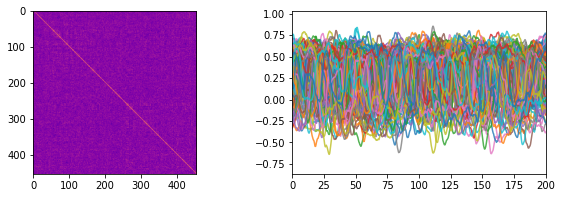

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))
axs[0].imshow(func.fc(model.exc[:, -10000:]))
axs[1].plot(model.t, model.exc[::5, :].T, alpha=0.8);
axs[1].set_xlim(0, 200)